In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:
import spinexchange
import potentials
import numpy as np
import pylab as plt

In [7]:
B_values = np.logspace(-3,1,50)
potT     = potentials.Silvera_Triplet
potS     = potentials.Kolos_SingletCombo
T        = 1e-5
Channels = [ ['a','a'],
             ['a','c'],
             ['b','d']]

LossesT=[]
LossesH=[]
for c in Channels:
    LossesT.append(spinexchange.GetGFactor(alpha='c',beta='c',alphaprime=c[0],betaprime=c[1],which='T', B_values=B_values,triplet_potential=potT,singlet_potential=potS,temp=T))
    LossesH.append(spinexchange.GetGFactor(alpha='c',beta='c',alphaprime=c[0],betaprime=c[1],which='H', B_values=B_values,triplet_potential=potT,singlet_potential=potS,temp=T))

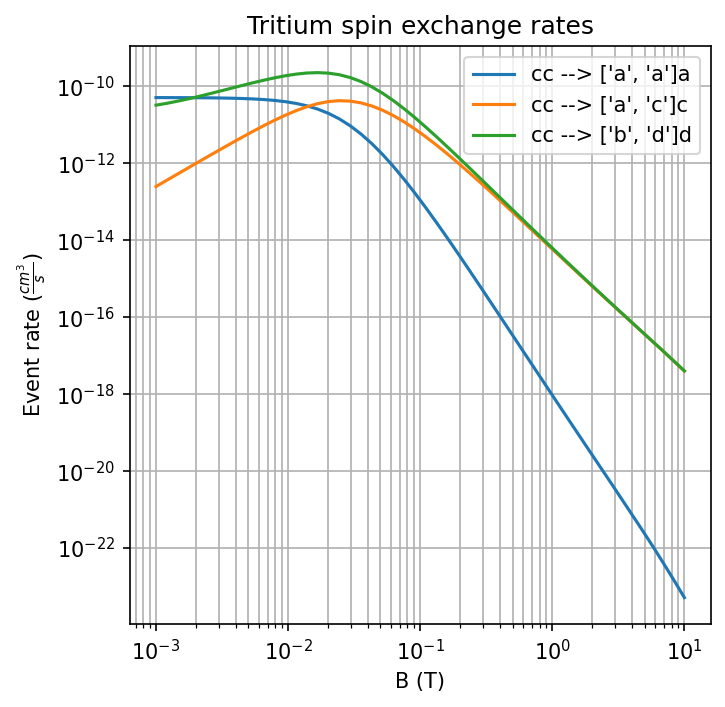

In [8]:
plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(Channels)):
    Label='cc --> '+str(Channels[ci])+str(Channels[ci][1])
    plt.plot(B_values,LossesT[ci],label=Label)
    plt.semilogy()
plt.xlabel("B (T)")
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.title("Tritium spin exchange rates")
plt.grid(which='both')
plt.legend()
plt.loglog()
plt.show()

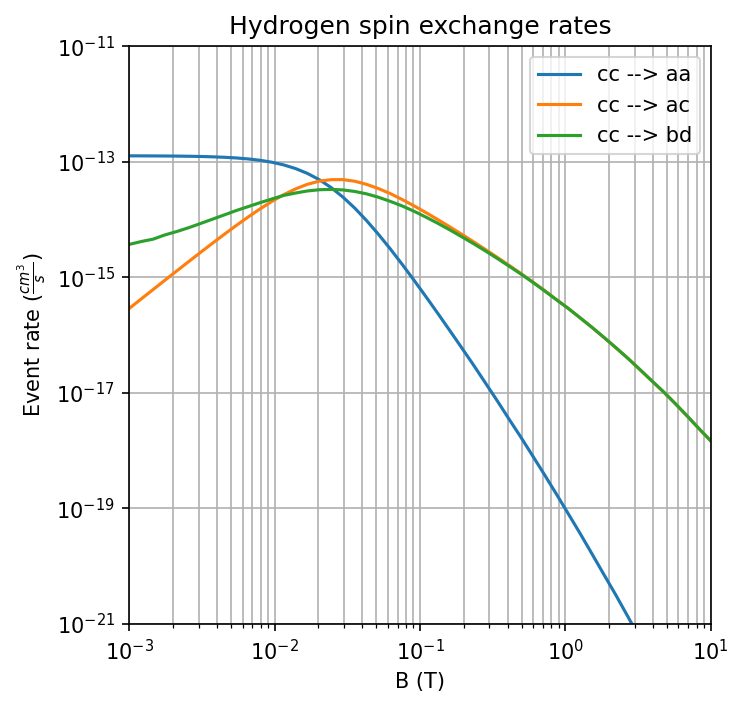

In [9]:
plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(Channels)):
    Label='cc --> '+str(Channels[ci][0])+str(Channels[ci][1])
    plt.plot(B_values,LossesH[ci],label=Label)
    plt.semilogy()
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Hydrogen spin exchange rates")
plt.grid(which='both')
plt.legend()
plt.loglog()
plt.show()